### Objective 1: Design a simple perceptron without using any library functions

In [6]:
from numpy import random

gInputs = []

class Perceptron():

    def setWeights(self, weightNum):
        weights = []
        for i in range(weightNum):
            weights.append(random.rand() * 2 - 1)
        return weights

    def activate(self, weights, inputs):
        global gInputs
        gInputs = inputs
        sum = 0
        for i in range(len(inputs)):
            sum += weights[i] * inputs[i]
        if sum >= 0:
            return 1
        else:
            return -1

    def updateWeights(self, learningRate, desired, sum):
        global gInputs
        newWeights = []
        print ("DESIRED ", desired)
        if desired != sum:
            error = desired - sum
            print("ERROR ", error)
            length = len(gInputs)
            for i in range(0, length):
                newWeights.append(learningRate * error * gInputs[i])
            return {'newWeights': newWeights, 'iterate': True}
        else:
            print("SUCCESS")
            return {'newWeights': newWeights, 'iterate': False}
        
inputs = [-1,-1,1]
weightNum = len(inputs)
weights = 0
learningRate = 0.01
desired = 1
iterate = True
iterCount = 0

ptron = Perceptron()
weights = ptron.setWeights(weightNum)
while iterate:
    print("-"*70)
    print("Initial Weights: ", weights)
    sum = ptron.activate(weights, inputs)
    print("Sum: ", sum)
    returned = ptron.updateWeights(learningRate, desired, sum)
    print("New Weights: ", returned['newWeights'])
    if not returned['iterate']:
        print("Iterations: ", iterCount)
        iterate = False
        print("-"*70)
    else:
        weights = returned['newWeights']
        iterCount = iterCount + 1

----------------------------------------------------------------------
Initial Weights:  [0.9640314472523808, 0.8834294907233979, 0.6868639550602591]
Sum:  -1
DESIRED  1
ERROR  2
New Weights:  [-0.02, -0.02, 0.02]
----------------------------------------------------------------------
Initial Weights:  [-0.02, -0.02, 0.02]
Sum:  1
DESIRED  1
SUCCESS
New Weights:  []
Iterations:  1
----------------------------------------------------------------------


### Objective 2 - Creating a dataset using rand function

In [1]:
import random

X = [[random.randint(1, 500) for _ in range(750)],[random.randint(250, 600) for _ in range(750)]]
y = [random.randint(1, 24) for _ in range(750)]


### Objective 3 - Using a Kaggle dataset, implement an ANN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data1=df.iloc[:,[3,4,5,6,7,8,9,10,1,12,13]]
data1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,CustomerId,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,15634602,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,15647311,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,15619304,113931.57,1
3,699,France,Female,39,1,0.00,2,0,15701354,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,15737888,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,15606229,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,15569892,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,15584532,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,15682355,92888.52,1


Encoding categorical data

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encoding 'Gender' and 'Geography'

l1 = LabelEncoder()
data1["Geography"]=l1.fit_transform(data1["Geography"])
data1["Gender"]=l1.fit_transform(data1["Gender"])
data1

/tmp/ipykernel_8576/496365326.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Geography"]=l1.fit_transform(data1["Geography"])
/tmp/ipykernel_8576/496365326.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Gender"]=l1.fit_transform(data1["Gender"])


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,CustomerId,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,15634602,101348.88,1
1,608,2,0,41,1,83807.86,1,0,15647311,112542.58,0
2,502,0,0,42,8,159660.80,3,1,15619304,113931.57,1
3,699,0,0,39,1,0.00,2,0,15701354,93826.63,0
4,850,2,0,43,2,125510.82,1,1,15737888,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,15606229,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,15569892,101699.77,0
9997,709,0,0,36,7,0.00,1,0,15584532,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,15682355,92888.52,1


In [6]:
x=data1.iloc[:,:-1].values
y=data1.iloc[:,-1].values

In [7]:
#Feature Scaling  use Normalization

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
p=scaler.fit_transform(x)
p

array([[0.538     , 0.        , 0.        , ..., 1.        , 0.27561613,
        0.50673489],
       [0.516     , 1.        , 0.        , ..., 0.        , 0.32645436,
        0.56270874],
       [0.304     , 0.        , 0.        , ..., 1.        , 0.21442143,
        0.56965435],
       ...,
       [0.718     , 0.        , 0.        , ..., 0.        , 0.07532731,
        0.21039009],
       [0.844     , 0.5       , 1.        , ..., 1.        , 0.46663653,
        0.46442905],
       [0.884     , 0.        , 0.        , ..., 1.        , 0.25048302,
        0.19091423]])

Splitting dataset

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=88)

Building ANN

In [11]:
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()

# Input layer
ann.add(Dense(units=6, activation='relu'))

ann.add(Dense(units=6, activation='relu'))

# Output layer
ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fit the ANN to training set

In [12]:
history = ann.fit(x_train, y_train, batch_size = 32, epochs = 100)  

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 8175.1416 - accuracy: 0.6921
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 1725.6356 - accuracy: 0.6927
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 1908.6490 - accuracy: 0.6776
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 2347.8337 - accuracy: 0.6776
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 1630.4680 - accuracy: 0.6817
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 1752.7502 - accuracy: 0.6815
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 2050.9661 - accuracy: 0.6825
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 1685.6604 - accuracy: 0.6740
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 1928.6481 - accuracy: 0.6829
Epoch 10/100
250/250 [==============================] - 0s 1ms/s

In [17]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print('Accuracy: ',ann.evaluate(x_test,y_test)[1])

63/63 [==============================] - 0s 644us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
63/63 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.7970
Accuracy:  0.796999990940094


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[1594    0]
 [ 406    0]]


79.7

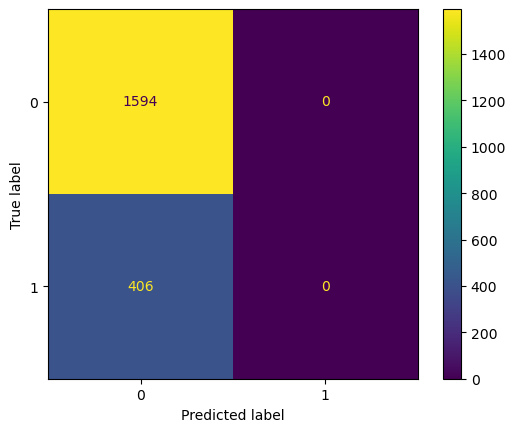

In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt
Confusion_Matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(Confusion_Matrix)
cm_display.plot()
plt.show()